# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [141]:
# import numpy and pandas

import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents. 

In [142]:
# Your code here:
data = pd.read_csv('Current_Employee_Names__Salaries__and_Position_Titles.csv')
data

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"ADRIANO, RACQUEL ANNE",PARAMEDIC,FIRE,F,Salary,NaN,72510.0,NaN
1,"AFFANEH, MAHIR A",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN
2,"AFOENYI, PHYLLIS",TITLE V PROGRAM TRAINEE I,FAMILY & SUPPORT,P,Hourly,20.0,NaN,13.0
3,"AGAR, BULENT B",DEPUTY COMMISSIONER,WATER MGMNT,F,Salary,NaN,132972.0,NaN
4,"AGEE, LAWRENCE",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN
...,...,...,...,...,...,...,...,...
33697,"ZYLINSKA, KLAUDIA",POLICE OFFICER,POLICE,F,Salary,NaN,72510.0,NaN
33698,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,76266.0,NaN
33699,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN
33700,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN


Examine the `salaries` dataset using the `head` function below.

In [143]:
# Your code here:

data['Annual Salary'].head(10)

0     72510.0
1     93354.0
2         NaN
3    132972.0
4     90024.0
5         NaN
6    111444.0
7    103932.0
8    107106.0
9     95736.0
Name: Annual Salary, dtype: float64

We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [144]:
# Your code here:
data.isna().sum()/len(data)


Name                 0.000000
Job Titles           0.000000
Department           0.000000
Full or Part-Time    0.000000
Salary or Hourly     0.000000
Typical Hours        0.757462
Annual Salary        0.242538
Hourly Rate          0.757462
dtype: float64

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [145]:
# Your code here:

data['Salary or Hourly'].value_counts()


Salary    25528
Hourly     8174
Name: Salary or Hourly, dtype: int64

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [146]:
# Your code here:

data.pivot_table(index= ['Department'], values = ['Name'], aggfunc = pd.Series.nunique)
# data.groupby('Department').agg({'Name':pd.Series.nunique})

,Name
Department,
ADMIN HEARNG,38
ANIMAL CONTRL,75
AVIATION,1855
BOARD OF ELECTION,111
BOARD OF ETHICS,8
BUDGET & MGMT,44
BUILDINGS,258
BUSINESS AFFAIRS,167
CITY CLERK,88


# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

H0 : the hypothesis here is that the mean salary of hourly workers is equal to $30/hr.

H1 : the hypothesis we are trying tp prove is that the mean hourly wage is NOT $30/hr.

the confidence intervals we are going to compute is going to tell us, up tu 95 % , wheter or not the H0 hypothesis is rejected or not.

In [147]:
data_num = data.select_dtypes(np.number)
data_num



,Typical Hours,Annual Salary,Hourly Rate
0,NaN,72510.0,NaN
1,NaN,93354.0,NaN
2,20.0,NaN,13.0
3,NaN,132972.0,NaN
4,NaN,90024.0,NaN
...,...,...,...
33697,NaN,72510.0,NaN
33698,NaN,76266.0,NaN
33699,NaN,90024.0,NaN
33700,NaN,93354.0,NaN


In [148]:
data['Hourly Rate'].value_counts()
data['Hourly Rate'].mean()

34.58644971862046

filling the Nan values by dropping them because we can assume that the hourly workers are not the annual workers and vice versa.

In [149]:
data_num_hour = data_num['Hourly Rate'].dropna()
display(data_num_hour.mean())
display(data_num_hour.value_counts())
data_num_hour.isna().sum()

34.58644971862046

37.45    1495
43.72     779
38.52     528
19.86     345
49.35     298
         ... 
21.84       1
50.50       1
44.74       1
30.00       1
37.69       1
Name: Hourly Rate, Length: 178, dtype: int64

0

as shown from our score, and the confidence interval, we can, with 95% certainty, say that the H0 is rejected , and that we failled to reject the H1. Therefore the hourly salary is NOT $30/hr, but higher.

In [150]:
# Your code here:
import scipy.stats

confidence_level = 0.95 
degrees_freedom = len(data_num_hour) - 1  
sample_mean = np.mean(data_num_hour)
sample_standard_error = scipy.stats.sem(data_num_hour)

confidence_interval = scipy.stats.t.interval(confidence_level, 
                                             degrees_freedom, 
                                             sample_mean, 
                                             sample_standard_error)


In [151]:
print( 'confidence interval is ', confidence_interval, '.' )

confidence interval is  (34.29839539204361, 34.874504045197305) .


In [152]:
from scipy.stats import ttest_1samp

stat, pval = ttest_1samp(data_num_hour, 30)

In [153]:
print('stat is  ', stat)  

print('pvalue for the two-tailed test is ', pval)

print('pvalue for the one-tailed test is ', pval/2)

stat is   31.211500329216044
pvalue for the two-tailed test is  3.825475847673794e-202
pvalue for the one-tailed test is  1.912737923836897e-202


from the results we have in the 2 tails tests we can inferred that we have significants evidence that the hourly wage is closer to 30$/ hour. 
Because our p value is significantly lower than the 0.05

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

H0 : the hypothesis here is that the annual salary employees is lower or equal than $86k/year.

H1 : the hypothesis we are trying tp prove is that annual salary employees is NOT lower than $86k/year.

the confidence intervals  and the p value are going to tell us, up tu 95 % , wheter or not the H0 hypothesis is rejected or not.

In [154]:
# Your code here:
# data.pivot_table(index= ['Department'], values = ['Name', 'Annual Salary'], aggfunc = pd.Series.nunique)

data_police = data[data['Department']=='POLICE']
data_police_annual = data_police[['Annual Salary']]
data_police_annual


,Annual Salary
1,93354.0
4,90024.0
6,111444.0
7,103932.0
9,95736.0
...,...
33696,80016.0
33697,72510.0
33698,76266.0
33699,90024.0


In [155]:
data_police_annual = data_police_annual.dropna()
data_police_annual.mean()



Annual Salary    88834.118924
dtype: float64

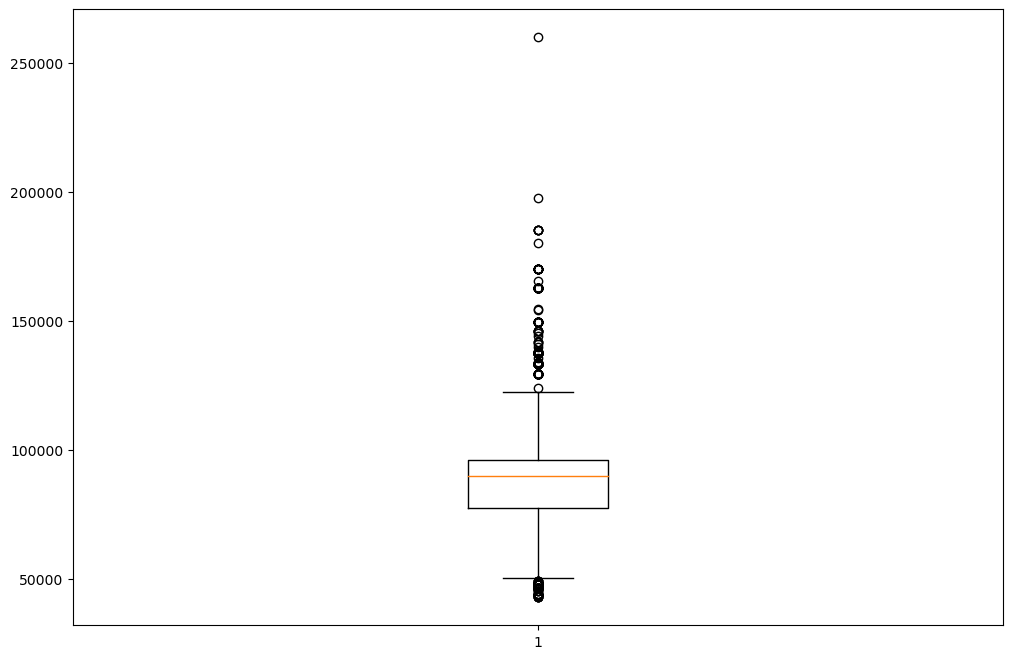

In [156]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
plt.boxplot(data_police_annual)
plt.show()



In [157]:
import scipy.stats

confidence_level = 0.95 
degrees_freedom = len(data_police_annual) - 1  
sample_mean = np.mean(data_police_annual)
sample_standard_error = scipy.stats.sem(data_police_annual)

confidence_interval = scipy.stats.t.interval(confidence_level, 
                                             degrees_freedom, 
                                             sample_mean, 
                                             sample_standard_error)

In [158]:
print( 'confidence interval is ', confidence_interval, '.' )

confidence interval is  (array([88534.11828859]), array([89134.11955863])) .


In [159]:
from scipy.stats import ttest_1samp

stat, pval = ttest_1samp(data_police_annual, 86000)

In [160]:
print('stat is  ', stat)  

print('pvalue for the two-tailed test is ', pval)

print('pvalue for the one-tailed test is ', pval/2)

stat is   [18.51748562]
pvalue for the two-tailed test is  [1.22391339e-75]
pvalue for the one-tailed test is  [6.11956695e-76]


From the confidence levels we can say, with 95% certainty, that the mean of this year annual salary is higher than last's year's 86000$/year. and that we can reject the H0 hypethesis.

Using the `crosstab` function, find the department that has the most hourly workers. 

In [161]:
# Your code here:

# data_crosstab = pd.crosstab(data['Department'], data['Hourly Rate'], margins=False)
# data_crosstab.sort_values(by='').head()

data_crosstab = pd.crosstab(data['Department'], data['Hourly Rate'], margins=True) 
data_crosstab.sort_values(by='All', ascending=False).head(2)  

Hourly Rate,2.65,8.25,9.74,10.0,10.5,12.0,13.0,13.4,13.45,13.94,...,53.4,53.91,54.05,54.1,55.1,57.04,58.4,61.65,128.0,All
Department,,,,,,,,,,,,,,,,,,,,,
All,260,4,2,2,1,16,62,107,1,49,...,48,1,30,24,12,68,10,1,1,8174
STREETS & SAN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,1846


the department with the most hourly workers is the Street and sanitation

The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

H0 : the hypothesis here is that the hourly workers of the sanitation department is equal or less than $35/hr.

H1 : the hypothesis we are trying tp prove is that the wage of the workers is hogher than $35/hr.

the confidence intervals  and the p value are going to tell us, up tu 95 % , wheter or not the H0 hypothesis is rejected or not.

In [162]:
st_san = data[data['Department']=='STREETS & SAN']
st_san = st_san[st_san['Hourly Rate'].isna()==False]
st_san_salary = st_san['Hourly Rate']
st_san_salary

15       40.78
16       38.52
26       38.52
49       29.96
65       37.45
         ...  
33623    38.01
33624    37.45
33667    37.45
33668    38.52
33676    25.95
Name: Hourly Rate, Length: 1846, dtype: float64

In [163]:
# Your code here:

confidence_interval = scipy.stats.t.interval(0.95, 
                                             len(st_san_salary) -1, 
                                             np.mean(st_san_salary), 
                                             scipy.stats.sem(st_san_salary))

In [164]:
print( 'confidence interval is ', confidence_interval, '.' )

confidence interval is  (35.28150811892018, 35.82308559722106) .


In [165]:
stat, pval = ttest_1samp(st_san_salary, 35)

In [166]:
print('stat is  ', stat)  

print('pvalue for the two-tailed test is ', pval)

print('pvalue for the one-tailed test is ', pval/2)

stat is   4.000138803968834
pvalue for the two-tailed test is  6.580474443773579e-05
pvalue for the one-tailed test is  3.2902372218867895e-05


p values for the one tailed test is still under the significance level therefore The H0 is rejected.

we can tell them, with 95 % cinfidence, that the wages in this department IS higher than $35/hr.

# Challenge 3: To practice - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [167]:
# Your code here:
from scipy.stats import t

confidence_interval = scipy.stats.t.interval(0.95, 
                                             len(data_num_hour) -1, 
                                             np.mean(data_num_hour), 
                                             scipy.stats.sem(data_num_hour))


In [168]:
print( 'confidence interval is ', confidence_interval, '.' )

confidence interval is  (34.29839539204361, 34.874504045197305) .


Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [169]:
# Your code here:
from scipy.stats import ttest_1samp

stat, pval = ttest_1samp(data_num_hour, 30)


In [170]:
print('stat is  ', stat)  

print('pvalue for the two-tailed test is ', pval)

print('pvalue for the one-tailed test is ', pval/2)

stat is   31.211500329216044
pvalue for the two-tailed test is  3.825475847673794e-202
pvalue for the one-tailed test is  1.912737923836897e-202


# Bonus Challenge - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [171]:
# Your code here:

from scipy.stats import zscore

In [172]:
hour_array = data['Hourly Rate'].to_numpy()
hour_array

array([nan, nan, 13., ..., nan, nan, nan])

In [180]:
zscore(hour_array,nan_policy = 'omit')
# zscores = t.zscore(hour_array)

array([        nan,         nan, -1.62490689, ...,         nan,
               nan,         nan])

In [178]:
# df = data['Hourly Rate'].apply(t.zscore)
# df
t.zscore(hour_array, axis = 1)


AttributeError: 't_gen' object has no attribute 'zscore'

In [181]:
data['Hourly Rate'].apply(t.zscore)

AttributeError: 't_gen' object has no attribute 'zscore'